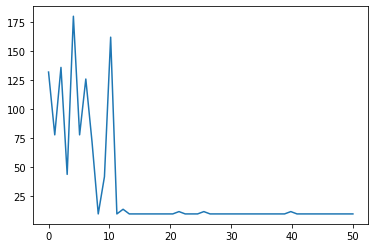

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file as a DataFrame
a_cnt_all = []

for i in range(1, 2):
    df = pd.read_csv('sampleNMV_(7,7)-'+str(i)+'.csv')
    df = df[df['reward'] == 1]
    df = df['a_cnt']
    df = np.array(df)
    a_cnt_all.append(df)
# Display the DataFrame
# print(np.array(a_cnt_all))
ave_vl = np.mean(a_cnt_all,axis=0)
sigma_vl = np.std(a_cnt_all,axis=0)

x = np.linspace(0,50)
plt.plot(x, ave_vl)
plt.fill_between(x, ave_vl+sigma_vl, ave_vl-sigma_vl, alpha=0.3)

df = pd.DataFrame(list(zip(ave_vl, ave_vl+sigma_vl, ave_vl-sigma_vl)), columns=['mean', '+', '-'])
df.to_csv('steps_vl.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd

import math

stateV_list = []
n_stateV_list = []

df = pd.read_csv('sampleNMV-1.csv')
for i in range(1,201):
    stateV = df[(df['s_row']==2) & (df['s_col']==4) & (df['episode']==i)]['stateV'].max()
    n_stateV = df[(df['s_row']==2) & (df['s_col']==4) & (df['episode']==i)]['n_stateV'].max()
    if math.isnan(stateV):
        stateV = 0
    if math.isnan(n_stateV):
        n_stateV = 0
    stateV_list.append(stateV)
    n_stateV_list.append(n_stateV)

(0.0, 2.1394560870244144)

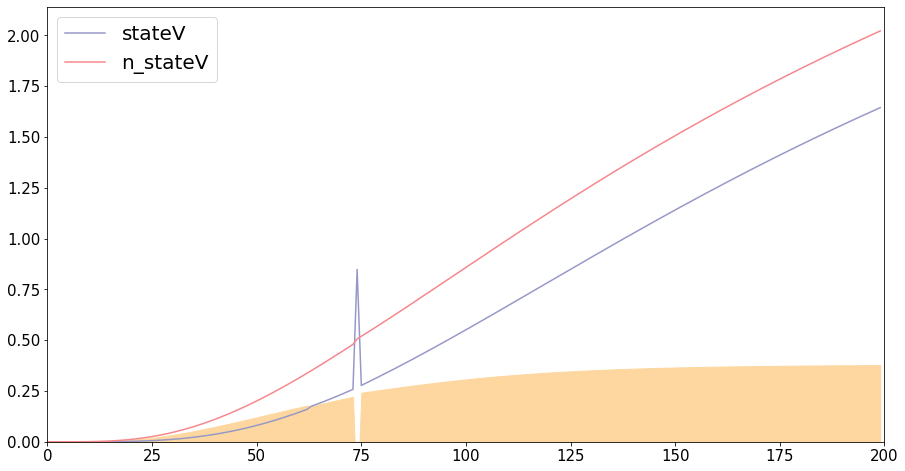

In [4]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(200)
y1 = np.array(stateV_list)
y2 = np.array(n_stateV_list)
sa = y2 - y1
# print(y1)
# print(y2, sa)

fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.fill_between(t,sa, color='#FDD79F')
ax.plot(t, y1, label='stateV', color='#9698C8')
ax.plot(t, y2, label='n_stateV', color='#F6878C')
# ax.set_title('learning_curve', fontsize=20)
ax.tick_params(labelsize=15)
# ax.set_xlabel('episode',fontsize=20)
# ax.set_ylabel('activity', fontsize=20)
ax.legend(fontsize='20')
plt.xlim(0,200)
plt.ylim(0,)
# plt.savefig('VL_stateV-n_stateV.svg')